# Simple data visualization

In [2]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('output/performance_scores/330_20200810.json') as f:
    performance_scores = json.load(f)

In [4]:
df = pd.DataFrame(performance_scores).transpose().sort_index()

In [5]:
column_order = [
    'best_pitch_slope_score_lower_constituents_with_pauses',
    'best_pitch_slope_score_middle_constituents_with_pauses',
    'best_pitch_slope_score_higher_constituents_with_pauses',
    'best_pitch_slope_score_lower_constituents_no_pauses',
    'best_pitch_slope_score_middle_constituents_no_pauses',
    'best_pitch_slope_score_higher_constituents_no_pauses',
    'best_duration_score_lower_constituents_with_pauses',
    'best_duration_score_middle_constituents_with_pauses',
    'best_duration_score_higher_constituents_with_pauses',
    'best_duration_score_lower_constituents_no_pauses',
    'best_duration_score_middle_constituents_no_pauses',
    'best_duration_score_higher_constituents_no_pauses'
]
df = df[column_order]

In [6]:
session_to_median_wcpm = {}
with open('data/moby-passages-36/data-330-child/WCPM.csv') as f:
    next(f)
    for line in f:
        session, response, value = line.strip().split(',')
        values = sorted([int(v) for v in value[1:-1].split('\t') if v])

        median_wcpm = values[len(values) // 2]
#         high_wcpm = sum()
        session_to_median_wcpm[session] = median_wcpm

In [7]:
session_to_median_wcpm_list = list(session_to_median_wcpm.items())
assert [x[0] for x in session_to_median_wcpm_list] == list(df.index)
df['mean_wcpm'] = [x[1] for x in session_to_median_wcpm_list]

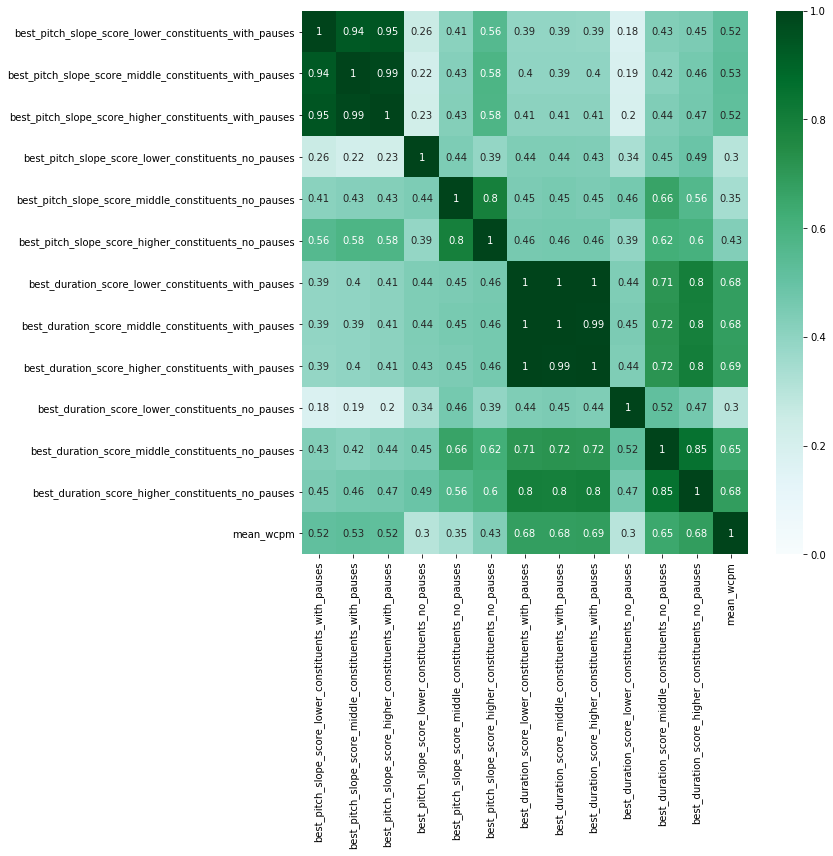

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='BuGn', vmin=0)
plt.show()